In [11]:
import pandas as pd
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = load_boston()
housing = pd.DataFrame(data=data.data, columns=data.feature_names)
housing['target'] = pd.Series(data.target)
print(housing.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


## Labels description

In [13]:
pd.set_option("max_colwidth", 9999)
pd.set_option("max_columns", 9999)
desc = load_boston().DESCR
description = pd.Series(desc).str.split(pat='\n',expand=True)
description

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,.. _boston_dataset:,,Boston house prices dataset,---------------------------,,**Data Set Characteristics:**,,:Number of Instances: 506,,:Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.,,:Attribute Information (in order):,- CRIM per capita crime rate by town,"- ZN proportion of residential land zoned for lots over 25,000 sq.ft.",- INDUS proportion of non-retail business acres per town,- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),- NOX nitric oxides concentration (parts per 10 million),- RM average number of rooms per dwelling,- AGE proportion of owner-occupied units built prior to 1940,- DIS weighted distances to five Boston employment centres,- RAD index of accessibility to radial highways,"- TAX full-value property-tax rate per $10,000",- PTRATIO pupil-teacher ratio by town,- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town,- LSTAT % lower status of the population,- MEDV Median value of owner-occupied homes in $1000's,,:Missing Attribute Values: None,,":Creator: Harrison, D. and Rubinfeld, D.L.",,This is a copy of UCI ML housing dataset.,https://archive.ics.uci.edu/ml/machine-learning-databases/housing/,,,This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.,,"The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic","prices and the demand for clean air', J. Environ. Economics & Management,","vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics","...', Wiley, 1980. N.B. Various transformations are used in the table on",pages 244-261 of the latter.,,The Boston house-price data has been used in many machine learning papers that address regression,problems.,,.. topic:: References,,"- Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.","- Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.",


## Correlation matrix
As we can see the LSTAT and RM are the two features which are highly correcalted with the target so we choose these two for prediction. Also it's vital to exclude the features that are higly correlated to each other such as RAD and TAX - use only one of those if higly correlated with the target.

<AxesSubplot:>

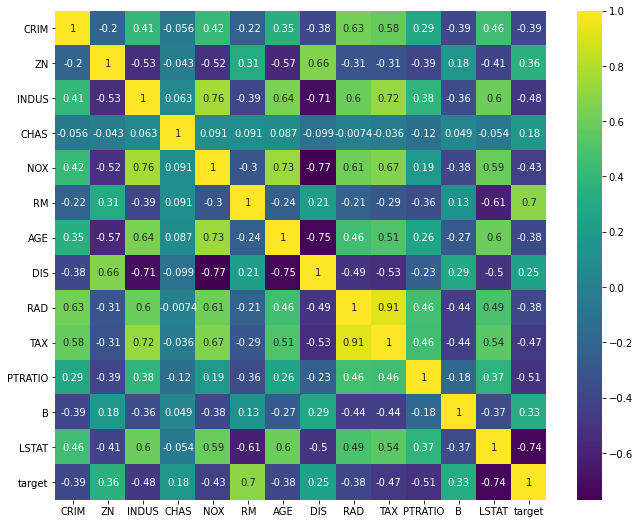

In [29]:
corr = housing.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True, cmap="viridis")


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [16]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
housing_X = housing.drop(columns=['target'])
X = housing_X.values
y = housing['target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## p-value
The lower p-value the better feature, so should I drop ZN, INDUS, CHAS, NOX and AGE? Or only the biggest ones - INDUS and AGE?

In [20]:
from regressors import stats

linreg = LinearRegression()
lr = linreg.fit(X_train,y_train)
stats.summary(lr, X, y, housing_X.columns)


Residuals:
     Min      1Q  Median      3Q      Max
-26.3399 -1.7559  0.6094  2.7568  17.2207


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept  31.631084    4.907262   6.4458  0.000000
CRIM        -0.133470    0.031668  -4.2147  0.000030
ZN           0.035809    0.010683   3.3520  0.000863
INDUS        0.049523    0.055779   0.8878  0.375052
CHAS         3.119835    0.854780   3.6499  0.000290
NOX        -15.417061    3.586972  -4.2981  0.000021
RM           4.057199    0.272890  14.8675  0.000000
AGE         -0.010821    0.009610  -1.1260  0.260681
DIS         -1.385998    0.180149  -7.6936  0.000000
RAD          0.242727    0.061501   3.9467  0.000090
TAX         -0.008702    0.001053  -8.2666  0.000000
PTRATIO     -0.910685    0.088903 -10.2436  0.000000
B            0.011794    0.001124  10.4909  0.000000
LSTAT       -0.547113    0.042065 -13.0063  0.000000
---
R-squared:  0.73659,    Adjusted R-squared:  0.72963
F-statistic: 105.83 on 13 features


In [21]:
y_pred = linreg.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np
MSE = mean_squared_error(y_pred,y_test)
MSE

21.517444231176903

In [25]:
RMSE = np.sqrt(MSE)
RMSE

4.638689926172788